<a href="https://colab.research.google.com/github/adityasahu88/ML_PROJECTS/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Features in the Dataset:**
MedInc (Median Income):

- The median income of households in a block group (in tens of thousands of dollars).
- This is one of the most significant predictors of housing prices.
HouseAge (Median House Age):

- The median age of houses in the block group.
- Indicates the overall age of properties in the area.
- AveRooms (Average Rooms per Household):

- The average number of rooms per household in a block group.
- Indicates the size and scale of housing units.
- AveBedrms (Average Bedrooms per Household):

- The average number of bedrooms per household in a block group.
Helps assess housing structure and affordability.
Population:

- The total population of the block group.
Gives an idea of population density and community size.
AveOccup (Average Occupancy):

- The average number of household members in a block group.
Reflects the social and demographic characteristics of the area.
Latitude:

- The geographical latitude of the block group's centroid.
Helps identify the region's location in California.
Longitude:

- The geographical longitude of the block group's centroid.
Used alongside latitude for geographic positioning.


**Target Variable:**
- MedHouseVal (Median House Value):
   - The median value of owner-occupied homes in a block group (in hundreds of thousands of dollars).
   - This is the variable we aim to predict using the features above.

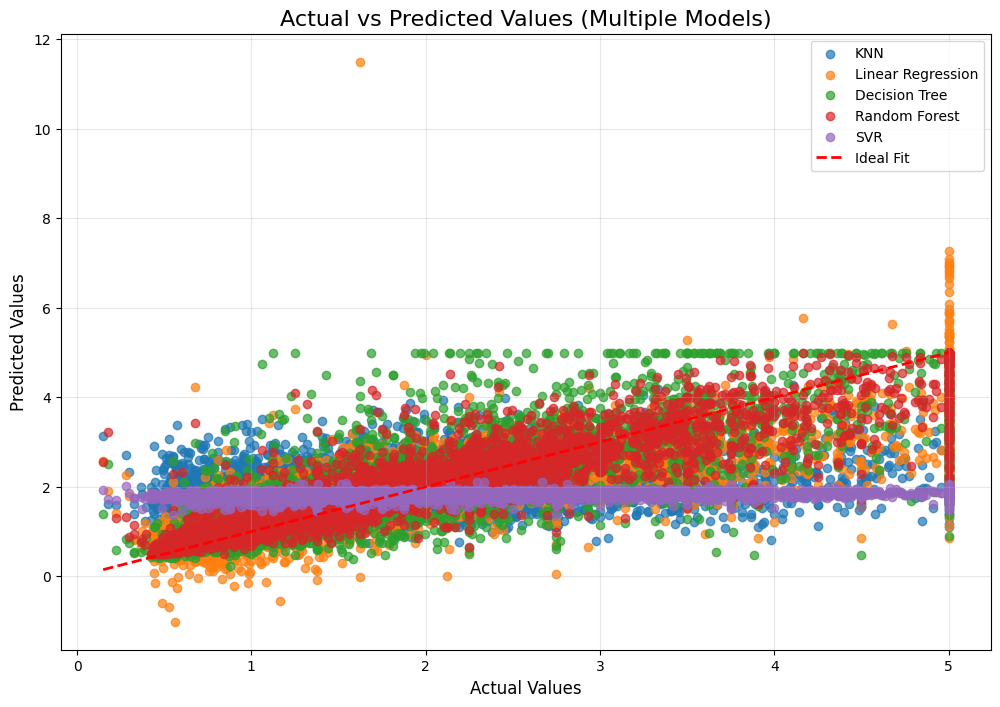

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the models
knn = KNeighborsRegressor(n_neighbors=5)
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=100)
svr = SVR()

# Train and predict with each model
models = {
    "KNN": knn,
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVR": svr
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Plot actual vs predicted for all models
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.7, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title("Actual vs Predicted Values (Multiple Models)", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()